In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew,kurtosis

import scipy as stats
from scipy.stats import norm , skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold ,cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
test.shape

(5681, 11)

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
train['source']='train'
test['source']='test'

In [12]:
db = pd.concat([train, test],ignore_index=True,sort=False)

In [13]:
db.shape

(14204, 13)

In [14]:
db.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
db.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Data Exploration

In [16]:
db.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### observations:

1. Item_Visibility has a min value of zero. There is no practical sense because when a product is being sold in a store, the visibility cannot be 0.

2. The lower "count" of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value .

In [17]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## remove skewness from dataset by using feature transformation

In [18]:
print('Skewness: %f' % train['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


Text(0.5, 0, 'cube_root-Item_Outlet_Sales')

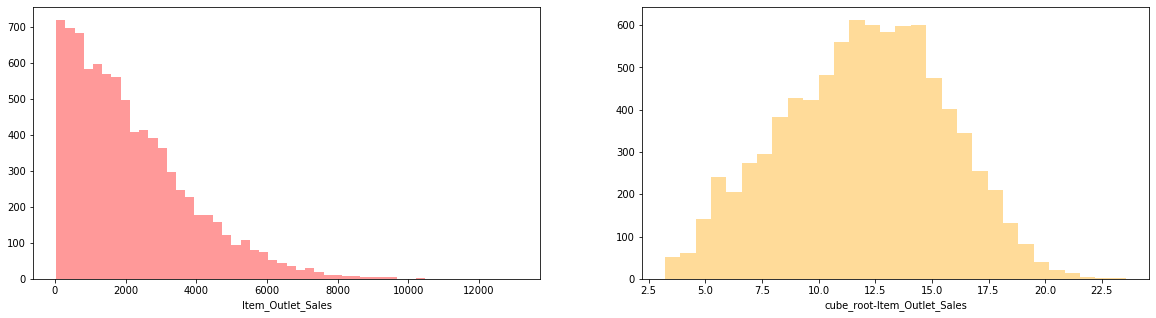

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.Item_Outlet_Sales, ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(train.Item_Outlet_Sales), ax=ax[1], bins=30, color="orange", kde=False)
ax[1].set_xlabel("cube_root-Item_Outlet_Sales")

In [20]:
print('Skewness: %f' % np.cbrt(train.Item_Outlet_Sales).skew())
print('Kurtsis: %f' %np.cbrt(train.Item_Outlet_Sales).kurt())

Skewness: -0.102507
Kurtsis: -0.532290


Text(0.5, 0, 'cube_root-Item_Visibility')

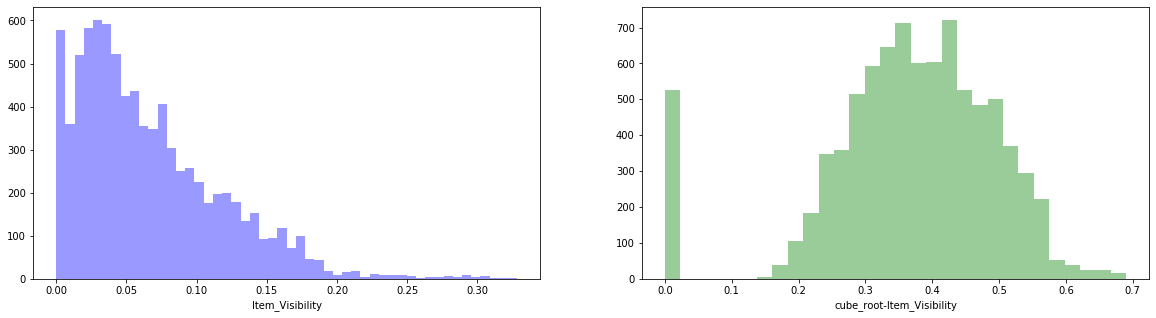

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.Item_Visibility, ax=ax[0], kde=False, color="blue")
sns.distplot(np.cbrt(train.Item_Visibility), ax=ax[1], bins=30, color="green", kde=False)
ax[1].set_xlabel("cube_root-Item_Visibility")

In [22]:
print('Skewness: %f' % train['Item_Visibility'].skew())
print('Kurtsis: %f' %train['Item_Visibility'].kurt())

Skewness: 1.167091
Kurtsis: 1.679445


In [23]:
print('Skewness: %f' % np.cbrt(train.Item_Visibility).skew())
print('Kurtsis: %f' %np.cbrt(train.Item_Visibility).kurt())

Skewness: -0.947394
Kurtsis: 1.313057


##### inverse cuberoot
np.power(x1, 3)

##### here, we can see that ITEM OUTLET SALES and  Item_Visibility variable is suffering from right skeweed after using cuberoot transformation my variable become normal distribution.

1. Deviated from the normal distribution.

2. here in this case positive skewness.

In [24]:
train_numerics_only = train.select_dtypes(include=np.number)

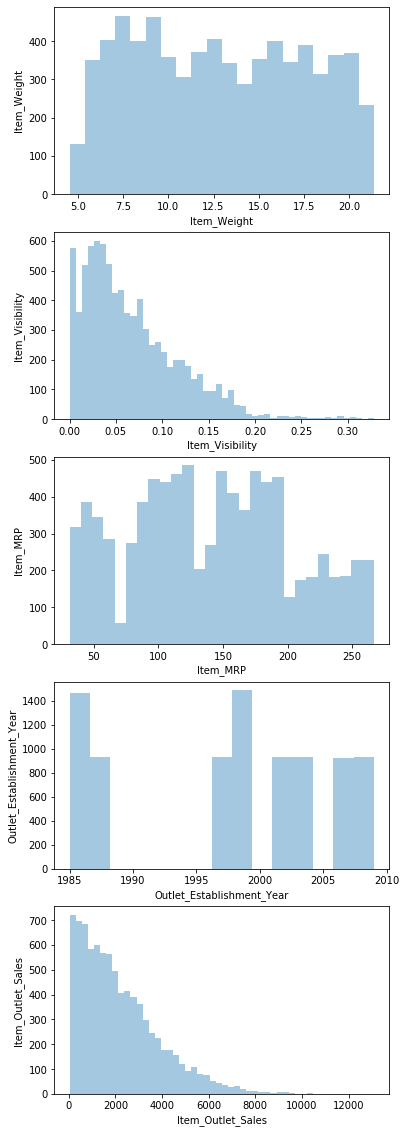

In [25]:
n=len(train_numerics_only.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*4))
#fig, ax = plt.subplots(n,1,2,figsize=(20,n*5))
for i in range(n):
    plt.sca(ax[i])
    col = train_numerics_only.columns[i]
    sns.distplot(train_numerics_only[col].dropna(),kde=False)
    plt.ylabel(col)

As we can see that it is a right skew variable and would need some data transformation to treat its skewness.

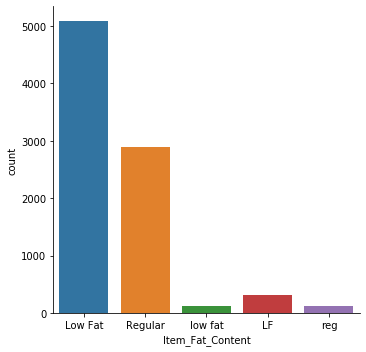

In [26]:
sns.catplot(x="Item_Fat_Content", kind="count", data=train)

here, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we will plot the same figure again.

In [27]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

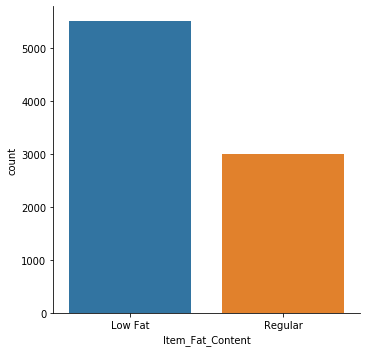

In [28]:
sns.catplot('Item_Fat_Content',kind = 'count',data =train)

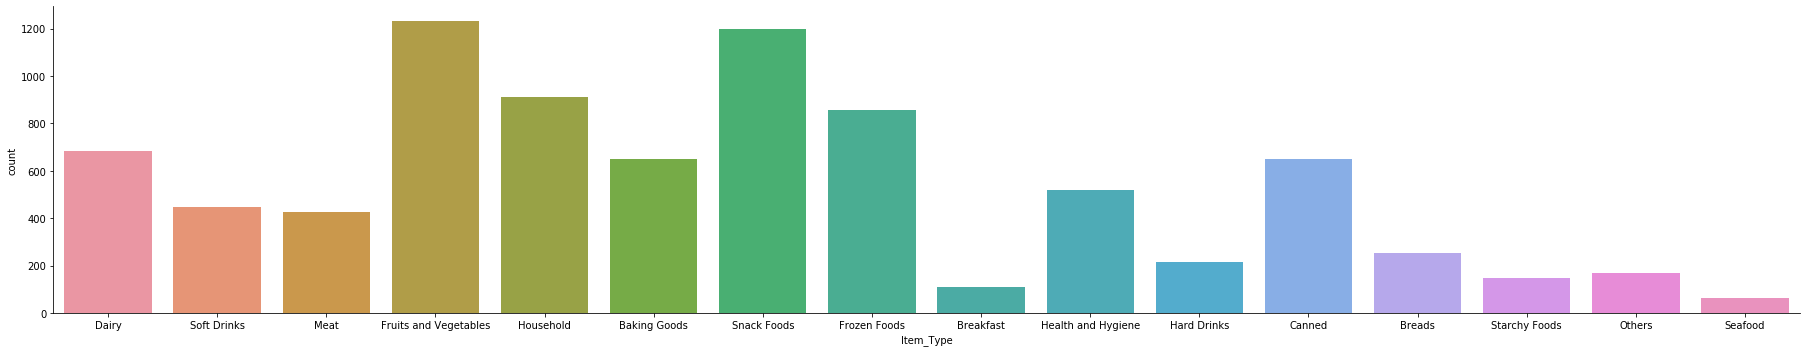

In [29]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =5)

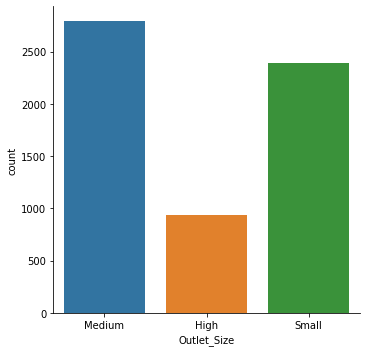

In [30]:
sns.catplot('Outlet_Size',kind = 'count',data = train,aspect = 1)

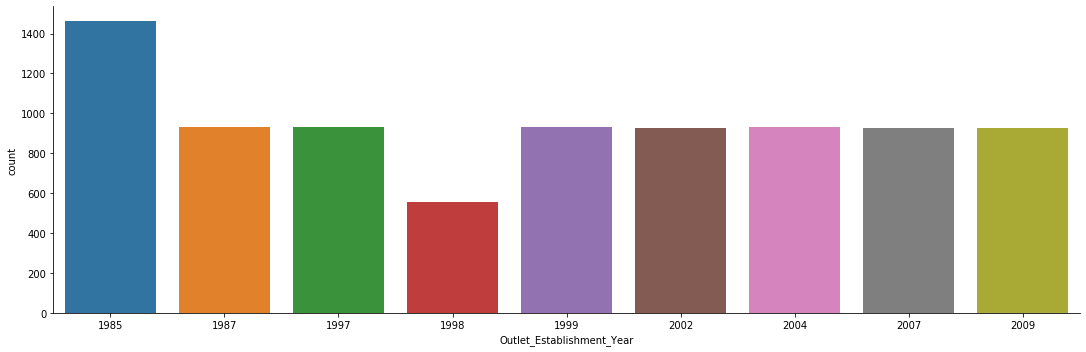

In [31]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =3)

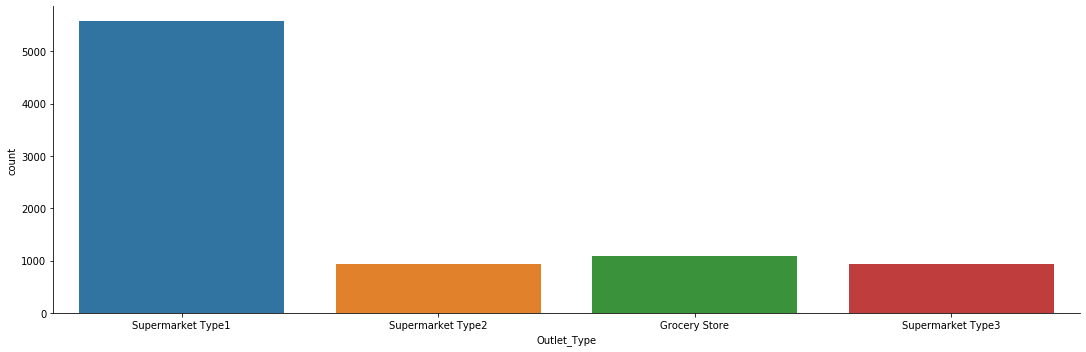

In [32]:
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =3)

# observation:

Less number of observations in the data for the outlets established in the year 1998 as compared to the other years. Supermarket Type 1 seems to be the most popular category of Outlet_Type.

~~look at the number of unique values in each of them

In [33]:
db.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

These tells us that there are 10 outlets/stores and 1559 products . Another thing that should catch attention is that Item_Type has 16 unique values. Let us explore further using the frequency of different categories in each nominal variable. I will exclude the ID and source variables for obvious reason.

In [34]:
categorial_feature = db.select_dtypes(include=[np.object])
categorial_feature.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [35]:
numerical_feature = db.select_dtypes(include=[np.number])
numerical_feature.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [36]:
db['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
categorical_column = [x for x in categorial_feature if x not in ['Item_Identifier','Outlet_Identifier','source']]

for column in categorical_column:
    print ('\nFrequency of Categories for varible %s'%column)
    print (db[column].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

output gives us following observations:

1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

2. Outlet_Type: Supermarket Type1, Type2 and Type3 can be combined. But before we should check if that’s a good approach.

# Data Cleaning

In [38]:
#Change categories of low fat:
print ('Original Categories:')
print (db['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
db['Item_Fat_Content'] = db['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (db['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [39]:
db.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Imputing Missing Value

We found two variables with missing values – Item_Weight and Outlet_Size. 

In [40]:
#Determine the average weight per item:
item_mean_weight = db.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight 
miss_boolean = db['Item_Weight'].isnull() 

#Impute data and check no. of missing values before and after imputation
print ('Original no. of missing: %d'% sum(miss_boolean))
db.loc[miss_boolean,'Item_Weight'] = db.loc[miss_boolean,'Item_Identifier'].apply(lambda t: item_mean_weight.at[t,'Item_Weight'])
print ('Final no. of missing: %d'% sum(db['Item_Weight'].isnull()))

Original no. of missing: 2439
Final no. of missing: 0


Let impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlets.

In [41]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_modes = db.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (outlet_size_modes)

#Get a boolean variable specifying missing Item_Weight values
miss = db['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal  no. of missing: %d'% sum(miss))
db.loc[miss,'Outlet_Size'] = db.loc[miss,'Outlet_Type'].apply(lambda x: outlet_size_modes[x])
print ('Final no. of missing: %d'%  sum(db['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal  no. of missing: 4016
Final no. of missing: 0


In [42]:
db.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Feature Engineering

Create a category of Type of Item

Item_Type variable has 16 categories which might be prove to be very useful in analysis. So its a good idea to combine them.

In [43]:
db['Item_Identifier'].apply(lambda x: x[0:2])

0        FD
1        DR
2        FD
3        FD
4        NC
5        FD
6        FD
7        FD
8        FD
9        FD
10       FD
11       FD
12       FD
13       FD
14       FD
15       FD
16       NC
17       FD
18       DR
19       FD
20       FD
21       FD
22       NC
23       FD
24       FD
25       NC
26       FD
27       DR
28       FD
29       FD
         ..
14174    FD
14175    FD
14176    FD
14177    FD
14178    FD
14179    FD
14180    FD
14181    FD
14182    DR
14183    FD
14184    DR
14185    FD
14186    DR
14187    DR
14188    DR
14189    FD
14190    FD
14191    FD
14192    FD
14193    FD
14194    FD
14195    NC
14196    FD
14197    DR
14198    FD
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Identifier, Length: 14204, dtype: object

In [44]:
#extract the first two characters of ID:
db['Item_Type_Combine'] = db['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more  categories:
db['Item_Type_Combine'] = db['Item_Type_Combine'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
db['Item_Type_Combine'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combine, dtype: int64

# One-Hot Coding of Categorical variables

In [45]:
db.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combine
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [46]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlets
db['Outlets'] = le.fit_transform(db['Outlet_Identifier'])
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combine','Outlet_Type','Outlets']
le = LabelEncoder()
for i in var:
    db[i] = le.fit_transform(db[i])

In [47]:
db.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combine,Outlets
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,1


One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present).

In [48]:
#One Hot Coding:
db= pd.get_dummies(db, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combine','Outlets'])

In [49]:
db.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combine_0            uint8
Item_Type_Combine_1            uint8
Item_Type_Combine_2            uint8
Outlets_0                      uint8
Outlets_1                      uint8
Outlets_2                      uint8
O

In [50]:
db.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlets_0,Outlets_1,Outlets_2,Outlets_3,Outlets_4,Outlets_5,Outlets_6,Outlets_7,Outlets_8,Outlets_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,1,...,0,1,0,0,0,0,0,0,0,0


In [51]:
db.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combine_0',
       'Item_Type_Combine_1', 'Item_Type_Combine_2', 'Outlets_0', 'Outlets_1',
       'Outlets_2', 'Outlets_3', 'Outlets_4', 'Outlets_5', 'Outlets_6',
       'Outlets_7', 'Outlets_8', 'Outlets_9'],
      dtype='object')

In [52]:
#Drop the columns which have been converted to different types:
db.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [53]:
db.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlets_0,Outlets_1,Outlets_2,Outlets_3,Outlets_4,Outlets_5,Outlets_6,Outlets_7,Outlets_8,Outlets_9
0,9.30,0.016047,249.8092,3735.1380,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,732.3800,train,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,train,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [54]:
#Divide into test and train:
final_train = db.loc[db['source']=="train"]
final_test = db.loc[db['source']=="test"]

In [55]:
final_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlets_0,Outlets_1,Outlets_2,Outlets_3,Outlets_4,Outlets_5,Outlets_6,Outlets_7,Outlets_8,Outlets_9
0,9.30,0.016047,249.8092,3735.1380,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,732.3800,train,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,train,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Modeling

In [56]:
final_train['Item_Visibility'] =np.cbrt(final_train.Item_Visibility)
X = final_train.drop(['Item_Outlet_Sales','source'],axis=1)
y = np.cbrt(final_train.Item_Outlet_Sales)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42)

# 1. LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = model.predict(X_test)

In [63]:
#np.power(x1, 3)
y_pred

array([10.59985697,  9.37153851,  9.57807507, ..., 14.54451965,
       12.04604726, 12.85172376])

In [64]:
y_pred = np.power(y_pred, 3)

In [65]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.6813318242551627, 0.6898995687260467)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [67]:
mean_squared_error(y_test, y_pred),mean_absolute_error(y_test, y_pred)

(5303726.696985946, 1952.7607282634124)

# find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [68]:
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")
def actual_predict(model, X_test, y_test):
    y_pred = cross_val_predict(model, X_test,y_test, cv=10)
    fig, ax = plt.subplots()
    cube_y_pred= np.power(y_pred, 3)
    cube_y_test= np.power(y_test, 3)
    ax.scatter(cube_y_test, cube_y_pred)
    ax.plot([cube_y_test.min(), cube_y_test.max()], [cube_y_test.min(), cube_y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    return plt.show()

In [69]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = mean_squared_error(y_test, y_pred, squared=False)
    train_RMSE = mean_squared_error(y_train, train_y_pred, squared=False)
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************
[14:58:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

 The best score across ALL searched params:
 0.692010671066629

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0

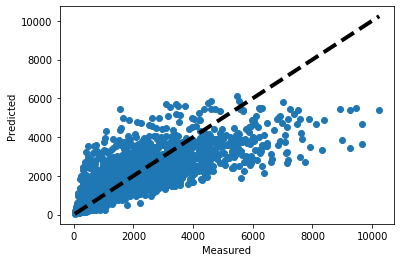

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6920649737659952

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 

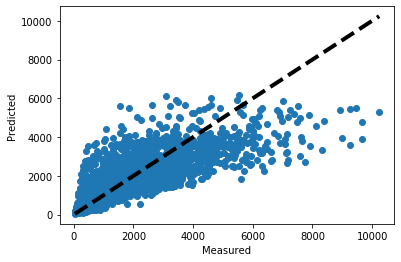

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6905776396210137

 The best parameters across ALL searched params:
 {'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 50}

 The train_RMSE across ALL models:
 1.917191473217778

 The test_RMSE across ALL models:
 1.9467900788238526



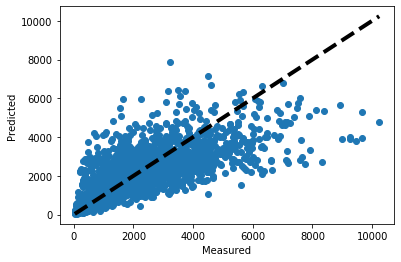

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])
    actual_predict(alg[i],X_test, y_test)

#### here , we can see that the XGBoosting model has best score and their actual and predicted values are nearby same as campare to other models.. 

## bar plot of features importances

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:49:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


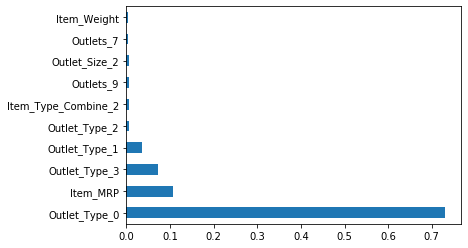

In [59]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh')

the most important feature for this model is 'outlet_type_0'

## save model

In [60]:
import pickle

In [61]:
filename='bigmartsale_XGBRegressor_model.sav'

In [62]:
pickle.dump(model, open(filename, 'wb'))

In [63]:
load_lr_model =pickle.load(open(filename, 'rb'))

[10:49:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
